<a href="https://colab.research.google.com/github/bartexx37/MachineLearning/blob/main/07_Food_Vision_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Mon Feb 13 14:33:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-02-13 14:33:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-13 14:33:45 (50.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
#Getting helper functions
import helper_functions as hp

In [6]:
#hp.unzip_data("101_food_classes_10_percent.zip")
#train_dir = "101_food_classes_10_percent/train/"
#test_dir = "101_food_classes_10_percent/test"
train_dir="C:/Users/barto/OneDrive/Pulpit/DL_TF/101_food_classes_10_percent/101_food_classes_10_percent/train"
test_dir="C:/Users/barto/OneDrive/Pulpit/DL_TF/101_food_classes_10_percent/101_food_classes_10_percent/test"

In [7]:
#How many images/classes there
hp.walk_through_dir("101_food_classes_10_percent")

In [8]:
#Get tensorflow Datasets
import tensorflow_datasets as tfds

In [9]:
dataset_list=tfds.list_builders()
print("food101" in dataset_list)

True


In [10]:
#Load in the data
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train","validation"],
                                             shuffle_files=True,
                                             as_supervised=True, #Data gets terutned in tuple format (data,label)
                                             with_info=True) #Meta-data info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteF3NSKU/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteF3NSKU/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [11]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [12]:
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [13]:
#Take one sample of train_data
train_one_sample = train_data.take(1) # Foremat (image tensor, label)
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [14]:
for image, label in train_one_sample:
    print(f"Image shape: {image.shape}, \nImage dtype: {image.dtype},\n Target class from food (tensor form): {label}, \nClass name {class_names[label.numpy()]}")

Image shape: (341, 512, 3), 
Image dtype: <dtype: 'uint8'>,
 Target class from food (tensor form): 98, 
Class name tiramisu


In [15]:
import tensorflow as tf
#As it can be seen, labels are not onehot encoded
#Check how image look like
image, tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(341, 512, 3), dtype=uint8, numpy=
 array([[[  2,   2,   0],
         [  2,   2,   0],
         [  2,   2,   0],
         ...,
         [  0,   3,   0],
         [  0,   4,   0],
         [  0,   4,   0]],
 
        [[  2,   2,   0],
         [  2,   2,   0],
         [  3,   3,   1],
         ...,
         [  1,   3,   0],
         [  0,   4,   0],
         [  0,   4,   0]],
 
        [[  5,   6,   1],
         [  5,   6,   1],
         [  5,   6,   1],
         ...,
         [  1,   3,   0],
         [  0,   4,   0],
         [  0,   5,   1]],
 
        ...,
 
        [[143,  75,  10],
         [149,  81,  16],
         [150,  85,  19],
         ...,
         [162,  88,  25],
         [150,  79,  17],
         [135,  65,   5]],
 
        [[144,  76,  11],
         [152,  84,  19],
         [145,  80,  16],
         ...,
         [126,  60,  12],
         [111,  50,   3],
         [ 95,  37,   0]],
 
        [[145,  77,  14],
         [150,  82,  19],
         [139,

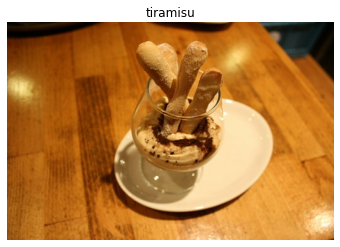

In [16]:
#Plot image
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

**PREPROCESS DATA TO MODELS TRAINING**
- Good shape
- Normalize -> between (0-1) generally performs better
- Data type -> models like float32 and with mixed precision float16/float32
- batches? -> Like all of the tensord within a batfch be the same size

**NOW DATA IS**
- In uint8 datatype
- With different size tensors
- Is not scaled              


In [17]:
#EfficientNetBx will be used, which has scaling built in, so rescaling is not needed in this case

#1. Reshape to same size
#2. Convert the dtype of images to float32

In [18]:
#Function to preprocess img
def preprocess_img(image,label,img_shape=224):
    '''
    Convert image datatype to float32 and reshapes
    image to  [img_shape,img_shape,color_channels]
    '''
    
    img=tf.image.resize(image,[img_shape,img_shape])
    return tf.cast(img, tf.float32), label # return (float32_image,label)

In [19]:
#preprocess single sample to check 
preprocessed_image = preprocess_img(image,label)[0]
print(f"Image before prep:\n {image[:2]}... \nShape: {image.shape}\nDatatype: {image.dtype}\n Prep image:\n{preprocessed_image[:2]}...\nShape: {preprocessed_image.shape}\nDatatype:{preprocessed_image.dtype}")

Image before prep:
 [[[2 2 0]
  [2 2 0]
  [2 2 0]
  ...
  [0 3 0]
  [0 4 0]
  [0 4 0]]

 [[2 2 0]
  [2 2 0]
  [3 3 1]
  ...
  [1 3 0]
  [0 4 0]
  [0 4 0]]]... 
Shape: (341, 512, 3)
Datatype: <dtype: 'uint8'>
 Prep image:
[[[2.         2.         0.        ]
  [2.947226   2.947226   0.947226  ]
  [4.         5.         0.        ]
  ...
  [1.         3.         0.        ]
  [0.01865775 2.757497   0.        ]
  [0.         4.         0.        ]]

 [[4.350446   5.1339283  0.7834821 ]
  [4.566964   5.350446   1.        ]
  [4.783482   5.783482   0.7834821 ]
  ...
  [1.         3.         0.        ]
  [0.7989505  2.7989504  0.        ]
  [0.         4.2798424  0.27984235]]]...
Shape: (224, 224, 3)
Datatype:<dtype: 'float32'>


**Batch and prepare datasets**
- input pipelines

Map preprocessing function to training (and parallelize)

In [20]:
#Mapping
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)#PO to, żeby możliwie jak największą
                                                                                         #liczbe chipów CPU wykorzysytwał równolegle
                                                                                         #Po defaultowo tylko 1 i wolniej
#Shuffle train_data and turn it into batches and prefetch it (load faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE) 
#shuffle(buffer_size Parameter say how many elements to shuffle in one moment, pamięć RAM może ograniczać ilość, stad nie całość na raz

#Map preprocessing function to test data
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
#prefetch - while program find patterns in one batch, during that time get another batch ready - pobierać wstępnie
#.catch() - zapisuje co sie dzieje w pamięci RAM, żeby pamietało, ale zapycha to RAM więc zależy

In [21]:
train_data,test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

Creating model callback

In [22]:
tensorboard_callback = hp.create_tensorboard_callback(dir_name="C:/Users/barto/OneDrive/Pulpit/DL_TF/t_board_food_app",
                               experiment_name="Vision_App")

checkpoint_path = "C:/Users/barto/OneDrive/Pulpit/DL_TF/foodapp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_acc",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

Saving TensorBoard log files to: C:/Users/barto/OneDrive/Pulpit/DL_TF/t_board_food_app/Vision_App/20230213-144409


**MIXED PRECISION TRAINING**

In [23]:
#Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")#Set global data policy to mixed precision
#For any part of tensorflow models learning if possible it combinates float32 with float16 to speed up model performance
mixed_precision.global_policy()

<Policy "mixed_float16">

**BUILDING FEATURE EXTRACTION MODEL**

In [24]:
from tensorflow.keras.layers.experimental import preprocessing
augmentation_layer = tf.keras.Sequential([
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomFlip(),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2)
],name="Augmentation_Layer")

In [25]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name="Input_Layer")

#If  scaling woulkd be needed then
#x= preprocessing.Rescaling(1/255.)(X) or in augmentation layer 

#x = augmentation_layer(inputs)
x = base_model(inputs,training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="Polling")(x)
x = tf.keras.layers.Dense(101)(x)
outputs = tf.keras.layers.Activation("softmax",dtype=tf.float32,name="softmax_float32")(x)

model = tf.keras.Model(inputs,outputs)

#Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Because this time labeles are not onehot encoded
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16705208/16705208 [==============================] - 1s 0us/step


In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Polling (GlobalAveragePooli  (None, 1280)             0         
 ng2D)                                                           
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [27]:
#Check dtype of base model
for layer in base_model.layers:
    print(layer.name,layer.dtype, layer.dtype_policy)

input_1 float32 <Policy "float32">
rescaling float32 <Policy "mixed_float16">
normalization float32 <Policy "mixed_float16">
rescaling_1 float32 <Policy "mixed_float16">
stem_conv_pad float32 <Policy "mixed_float16">
stem_conv float32 <Policy "mixed_float16">
stem_bn float32 <Policy "mixed_float16">
stem_activation float32 <Policy "mixed_float16">
block1a_dwconv float32 <Policy "mixed_float16">
block1a_bn float32 <Policy "mixed_float16">
block1a_activation float32 <Policy "mixed_float16">
block1a_se_squeeze float32 <Policy "mixed_float16">
block1a_se_reshape float32 <Policy "mixed_float16">
block1a_se_reduce float32 <Policy "mixed_float16">
block1a_se_expand float32 <Policy "mixed_float16">
block1a_se_excite float32 <Policy "mixed_float16">
block1a_project_conv float32 <Policy "mixed_float16">
block1a_project_bn float32 <Policy "mixed_float16">
block2a_expand_conv float32 <Policy "mixed_float16">
block2a_expand_bn float32 <Policy "mixed_float16">
block2a_expand_activation float32 <Poli

**FIT THE MODEL**
1. Feature extraction
2. Fine tuning

In [28]:
#Fitting model
history = model.fit(train_data,
                    epochs=3,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.15*len(test_data)),
                    callbacks=[tensorboard_callback,model_checkpoint])

Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.7176 - accuracy: 0.5836

2368/2368 [==============================] - 211s 82ms/step - loss: 1.7176 - accuracy: 0.5836 - val_loss: 1.1321 - val_accuracy: 0.6944
Epoch 2/3
2368/2368 [==============================] - ETA: 0s - loss: 1.2005 - accuracy: 0.6880

2368/2368 [==============================] - 189s 79ms/step - loss: 1.2005 - accuracy: 0.6880 - val_loss: 1.0352 - val_accuracy: 0.7166
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.0540 - accuracy: 0.7250

2368/2368 [==============================] - 190s 79ms/step - loss: 1.0540 - accuracy: 0.7250 - val_loss: 0.9947 - val_accuracy: 0.7267


In [29]:
model_eval=model.evaluate(test_data)

790/790 [==============================] - 52s 66ms/step - loss: 0.9997 - accuracy: 0.7302


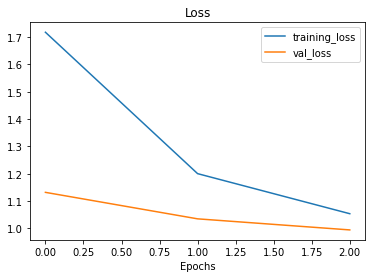

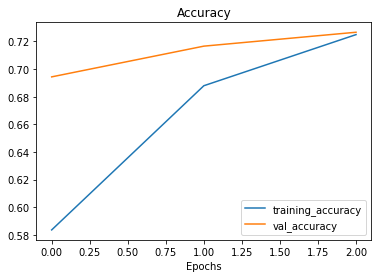

In [30]:
hp.plot_loss_curves(history)

In [31]:
tf.__version__

'2.11.0'

In [32]:
for layer in base_model.layers:
  print(layer.name,layer.dtype,layer.dtype_policy)

input_1 float32 <Policy "float32">
rescaling float32 <Policy "mixed_float16">
normalization float32 <Policy "mixed_float16">
rescaling_1 float32 <Policy "mixed_float16">
stem_conv_pad float32 <Policy "mixed_float16">
stem_conv float32 <Policy "mixed_float16">
stem_bn float32 <Policy "mixed_float16">
stem_activation float32 <Policy "mixed_float16">
block1a_dwconv float32 <Policy "mixed_float16">
block1a_bn float32 <Policy "mixed_float16">
block1a_activation float32 <Policy "mixed_float16">
block1a_se_squeeze float32 <Policy "mixed_float16">
block1a_se_reshape float32 <Policy "mixed_float16">
block1a_se_reduce float32 <Policy "mixed_float16">
block1a_se_expand float32 <Policy "mixed_float16">
block1a_se_excite float32 <Policy "mixed_float16">
block1a_project_conv float32 <Policy "mixed_float16">
block1a_project_bn float32 <Policy "mixed_float16">
block2a_expand_conv float32 <Policy "mixed_float16">
block2a_expand_bn float32 <Policy "mixed_float16">
block2a_expand_activation float32 <Poli

**Create some callbacks**

In [33]:
early_stoping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                          patience=3)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="C:/Users/barto/OneDrive/Pulpit/DL_TF/t_board_food_app/VisionApp_FineTuning")
ModelChecpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="C:/Users/barto/OneDrive/Pulpit/DL_TF/foodapp_finetune.ckpt",
                                                            monitor="val_loss",
                                                            verbose=1,
                                                            save_best_only=True,
                                                            save_weights_only=True)

**Create a fine tune model**

In [34]:
#Creatin learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                factor=0.2, # Reducing learning rate by multiplying it by 0.2 whic is equal to reducing 5x
                                                patience=2, # When stops to improve after 2 epochs then models decrease learning rate
                                                verbose=1, # Print when learning rate is decreased
                                                min_lr = 1e-7)

In [35]:

for layer in model.layers:
  layer.trainable = True # Make layers trainable to fine tuning - ther were frozen due to making feature extraction, but to fine tune efficient_net layer -> exchanging them to be trainable

In [36]:
for layer in base_model.layers[:20]:
  print(layer.name, layer.trainable,layer.dtype_policy)

input_1 True <Policy "float32">
rescaling True <Policy "mixed_float16">
normalization True <Policy "mixed_float16">
rescaling_1 True <Policy "mixed_float16">
stem_conv_pad True <Policy "mixed_float16">
stem_conv True <Policy "mixed_float16">
stem_bn True <Policy "mixed_float16">
stem_activation True <Policy "mixed_float16">
block1a_dwconv True <Policy "mixed_float16">
block1a_bn True <Policy "mixed_float16">
block1a_activation True <Policy "mixed_float16">
block1a_se_squeeze True <Policy "mixed_float16">
block1a_se_reshape True <Policy "mixed_float16">
block1a_se_reduce True <Policy "mixed_float16">
block1a_se_expand True <Policy "mixed_float16">
block1a_se_excite True <Policy "mixed_float16">
block1a_project_conv True <Policy "mixed_float16">
block1a_project_bn True <Policy "mixed_float16">
block2a_expand_conv True <Policy "mixed_float16">
block2a_expand_bn True <Policy "mixed_float16">


In [37]:
#Recompile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),#Starts with 1e-4
              metrics=["accuracy"])

In [38]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Polling (GlobalAveragePooli  (None, 1280)             0         
 ng2D)                                                           
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 4,136,929
Non-train

In [39]:
#Refit the model
history_finetuned = model.fit(train_data,
                              epochs=100,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=int(0.15*len(test_data)),
                              callbacks=[early_stoping_callback,
                                         tensorboard_callback,
                                         ModelChecpoint_callback,
                                         reduce_lr]
                              )

Epoch 1/100
2368/2368 [==============================] - ETA: 0s - loss: 0.8727 - accuracy: 0.7643
Epoch 1: val_loss improved from inf to 0.76090, saving model to C:/Users/barto/OneDrive/Pulpit/DL_TF/foodapp_finetune.ckpt
2368/2368 [==============================] - 416s 156ms/step - loss: 0.8727 - accuracy: 0.7643 - val_loss: 0.7609 - val_accuracy: 0.7868 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - ETA: 0s - loss: 0.5413 - accuracy: 0.8506
Epoch 2: val_loss improved from 0.76090 to 0.75578, saving model to C:/Users/barto/OneDrive/Pulpit/DL_TF/foodapp_finetune.ckpt
2368/2368 [==============================] - 370s 155ms/step - loss: 0.5413 - accuracy: 0.8506 - val_loss: 0.7558 - val_accuracy: 0.7934 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - ETA: 0s - loss: 0.3059 - accuracy: 0.9123
Epoch 3: val_loss did not improve from 0.75578
2368/2368 [==============================] - 373s 156ms/step - loss: 0.3059 - accuracy: 0.9123 - v

In [40]:
model_evaluate_fine_tune = model.evaluate(test_data
                                        )

790/790 [==============================] - 52s 65ms/step - loss: 1.0269 - accuracy: 0.8034


In [41]:
tf.saved_model.save(model, export_dir="C:/Users/barto/OneDrive/Pulpit/DL_TF/FoodVisionApp")

In [43]:
loaded_model = tf.saved_model.load("C:/Users/barto/OneDrive/Pulpit/DL_TF/FoodVisionApp")

In [44]:
loaded_model.evaluate(test_data)

AttributeError: ignored

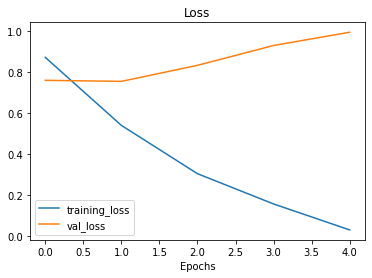

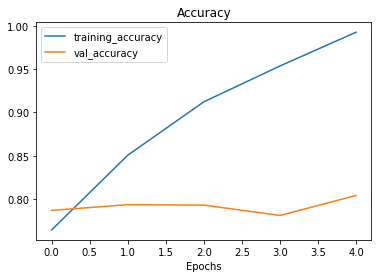

In [45]:
hp.plot_loss_curves(history_finetuned)

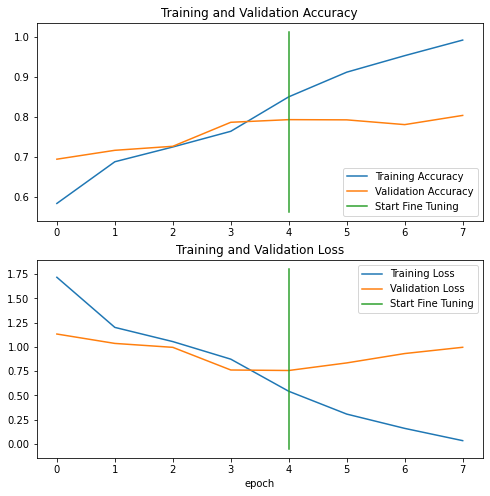

In [46]:
hp.compare_historys(original_history=history,new_history=history_finetuned)

In [48]:
loaded_model_keras = tf.keras.Model(loaded_model)

In [49]:
loaded_model_keras.evaluate(test_data)

RuntimeError: ignored